In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [168]:
# file_path = "/content/drive/MyDrive/application_record.csv"
# df = pd.read_csv(file_path)

df = pd.read_csv("application_record.csv")

In [169]:
# from google.colab import drive
# drive.mount('/content/drive')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [171]:

# Convertir CODE_GENDER en variables dummy (Femenino y Masculino)
df = pd.get_dummies(df, columns=['CODE_GENDER'], prefix='CODE_GENDER')
df[['CODE_GENDER_F', 'CODE_GENDER_M']].head()


,CODE_GENDER_F,CODE_GENDER_M
0,False,True
1,False,True
2,False,True
3,True,False
4,True,False


In [172]:
df[
    (df['CODE_GENDER_M'] == 1) &
    (df['FLAG_OWN_CAR'] == 0) &  # Recuerda que Y fue reemplazado por 0
    (df['NAME_INCOME_TYPE'] == "Working") &
    (df['NAME_FAMILY_STATUS'] == 1)  # ya no existe NAME_FAMILY_STATUS, fue reemplazada
]

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M


In [173]:
# cambiamos el tipo de dato de CNT_FAM_MEMBERS y AMT_INCOME_TOTAL a int
df = df.astype({'CNT_FAM_MEMBERS': 'int', 'AMT_INCOME_TOTAL': 'int'})

In [174]:
df.dtypes

ID                      int64
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL        int64
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH              int64
DAYS_EMPLOYED           int64
FLAG_MOBIL              int64
FLAG_WORK_PHONE         int64
FLAG_PHONE              int64
FLAG_EMAIL              int64
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int64
CODE_GENDER_F            bool
CODE_GENDER_M            bool
dtype: object

In [175]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M
0,5008804,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,False,True
1,5008805,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,False,True
2,5008806,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,False,True
3,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False
4,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False


In [176]:
if 'CODE_GENDER' in df.columns:
    df = pd.get_dummies(df, columns=['CODE_GENDER'], prefix='CODE_GENDER')
else:
    print("La columna 'CODE_GENDER' no está en el DataFrame")

La columna 'CODE_GENDER' no está en el DataFrame


In [177]:
df.isnull().sum()

ID                          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
CODE_GENDER_F               0
CODE_GENDER_M               0
dtype: int64

In [178]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CODE_GENDER_F          0
CODE_GENDER_M          0
dtype: int64

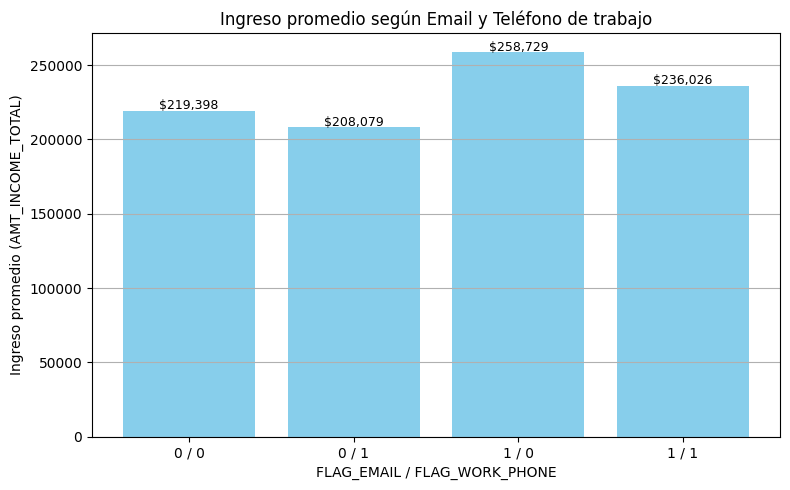

In [179]:
# Filtrar solo "Commercial associate" si lo deseas
subset = df[df.NAME_INCOME_TYPE == 'Commercial associate']

# Agrupar por FLAG_EMAIL y FLAG_WORK_PHONE y calcular ingreso promedio y conteo
income_stats = subset.groupby(['FLAG_EMAIL', 'FLAG_WORK_PHONE'])['AMT_INCOME_TOTAL'].agg(['mean', 'count']).reset_index()

# Crear una columna combinada para graficar
income_stats['combo'] = income_stats['FLAG_EMAIL'].astype(str) + ' / ' + income_stats['FLAG_WORK_PHONE'].astype(str)

# Graficar ingreso promedio por combinación
plt.figure(figsize=(8, 5))
plt.bar(income_stats['combo'], income_stats['mean'], color='skyblue')

# Opcional: mostrar cantidad sobre cada barra
for i, val in enumerate(income_stats['mean']):
    plt.text(i, val + 1000, f"${val:,.0f}", ha='center', fontsize=9)

plt.title('Ingreso promedio según Email y Teléfono de trabajo')
plt.xlabel('FLAG_EMAIL / FLAG_WORK_PHONE')
plt.ylabel('Ingreso promedio (AMT_INCOME_TOTAL)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Este grafico nos añade informacion acerca de las personas que tenemos en la base de datos, nos suministra la informacion para poder saber que tan dificies o faciles son de contactar para poder darles un credito, resultando 1/1 menos favorable

<Axes: >

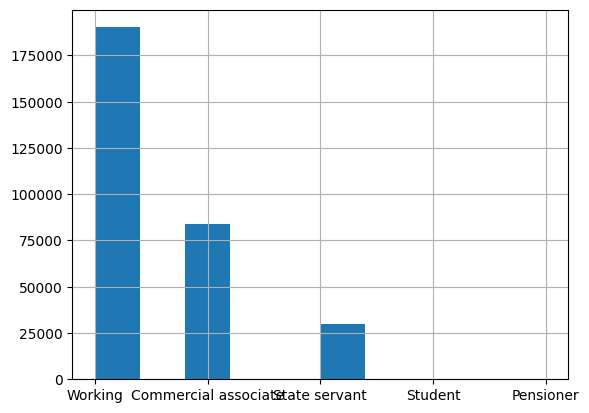

In [180]:
df['NAME_INCOME_TYPE'].hist()

<Axes: >

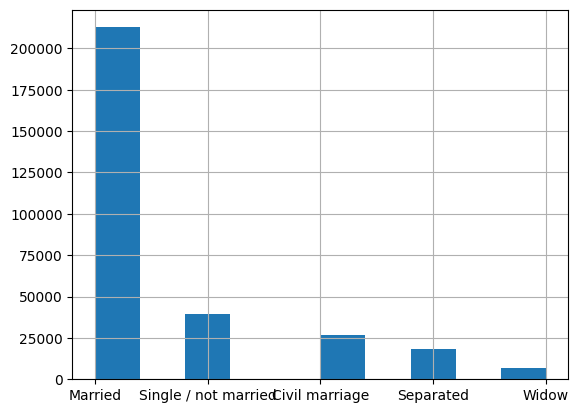

In [181]:
df['NAME_FAMILY_STATUS'].hist()

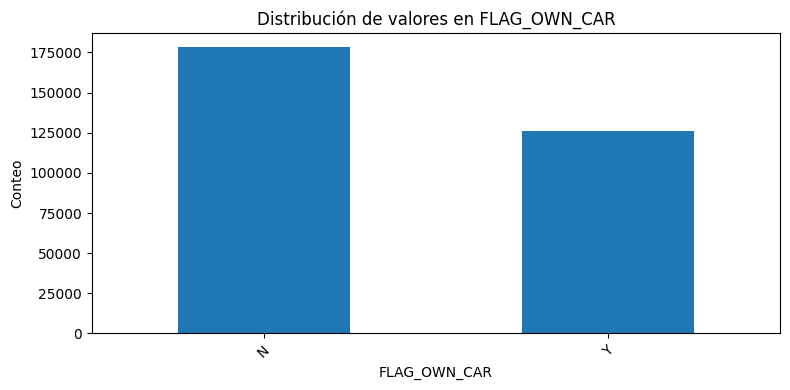

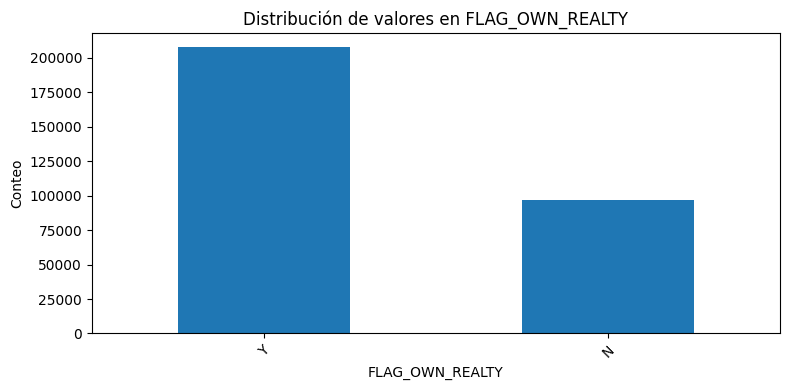

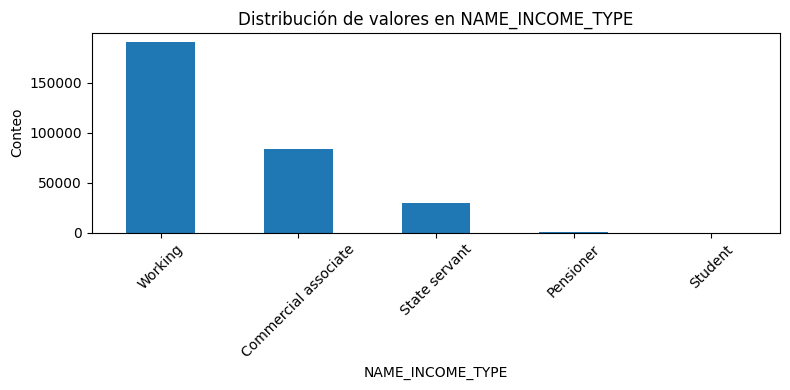

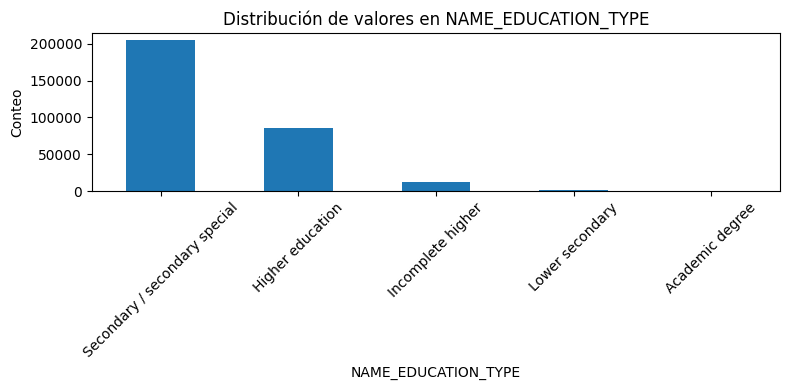

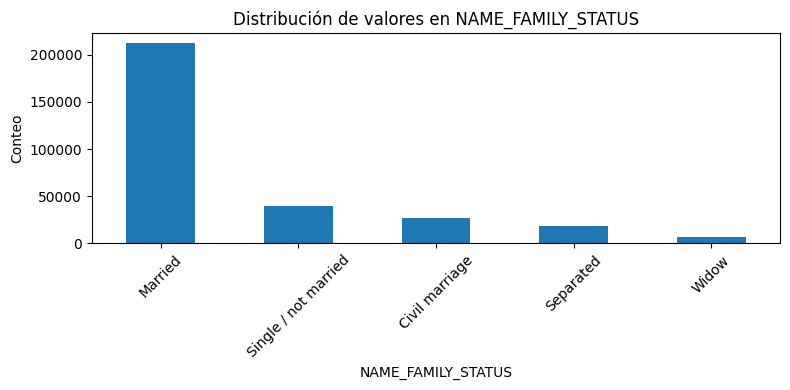

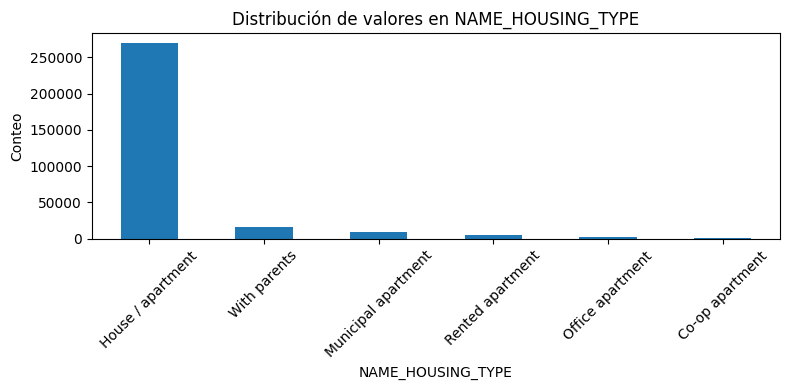

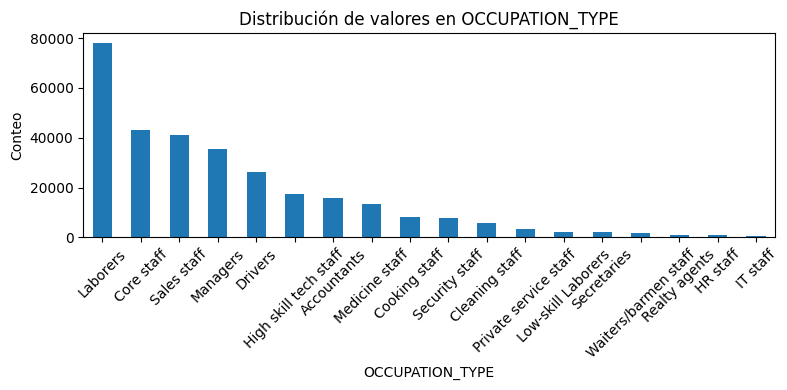

In [182]:
object_cols = df.select_dtypes(include=['object']).columns

# Recorrer cada columna de tipo object
for col in object_cols:
    plt.figure(figsize=(8, 4))  # Opcional: tamaño del gráfico
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Opcional: rotar etiquetas si son largas
    plt.tight_layout()
    plt.show()

In [183]:
df_num = df.select_dtypes(include=["number"])
df_num

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
2,5008806,0,112500,-21474,-1134,1,0,0,0,2
3,5008808,0,270000,-19110,-3051,1,0,1,1,1
4,5008809,0,270000,-19110,-3051,1,0,1,1,1
5,5008810,0,270000,-19110,-3051,1,0,1,1,1
6,5008811,0,270000,-19110,-3051,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
438541,6837707,0,202500,-13510,-2309,1,1,0,0,2
438548,6839936,1,135000,-12569,-2095,1,0,0,0,3
438553,6840222,0,103500,-15939,-3007,1,0,0,0,1
438554,6841878,0,54000,-8169,-372,1,1,0,0,1


In [184]:
df["CNT_CHILDREN"].describe()

count    304354.000000
mean          0.510977
std           0.765500
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [185]:
df["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     192856
1      73130
2      33512
3       4311
4        401
5        122
7          9
9          5
12         4
14         3
19         1
Name: count, dtype: int64

si la columna tiene 0 no hijos
si toma valor de 1 y 2 = almenos 2 hijos
si tiene mayor a 2  = tiene mas de 3 hijos

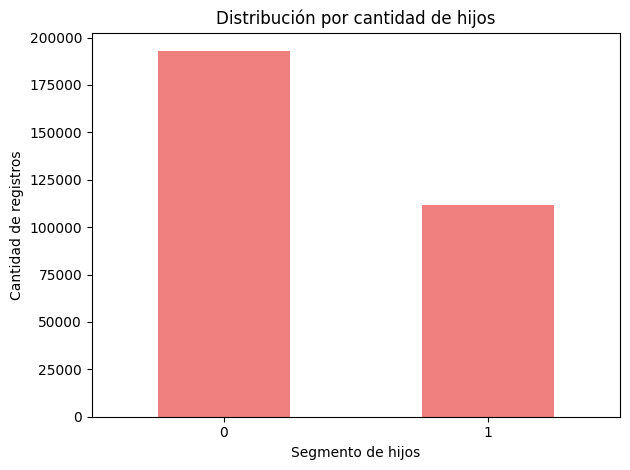

In [186]:
df = df[df['CNT_CHILDREN'].notnull()]

# Dividir la columna 'CNT_CHILDREN' en 2 segmentos: 'Tiene hijos' y 'No tiene hijos'
df['segmento_hijos'] = df['CNT_CHILDREN'].apply(lambda x: 0 if x == 0 else 1)

# Contar cuántos registros hay en cada grupo
segmentos = df['segmento_hijos'].value_counts().sort_index()

#elimina la columna hijos, y deja dos columnas simplificadas
df = df.drop(columns=['CNT_CHILDREN'])


# Graficar
segmentos.plot(kind='bar', color='lightcoral')
plt.title('Distribución por cantidad de hijos')
plt.xlabel('Segmento de hijos')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [187]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,segmento_hijos
2,5008806,Y,Y,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,False,True,0
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False,0
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False,0
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False,0
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False,0


# Pendientes por hacer en la base de datos


*   corregir datos NaN
*   Corregir fechas de cumpleaños, y dias trabajados



In [188]:
#cantidad de personas por estado civil/familiar
df["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married                 212721
Single / not married     39649
Civil marriage           26802
Separated                18470
Widow                     6712
Name: count, dtype: int64

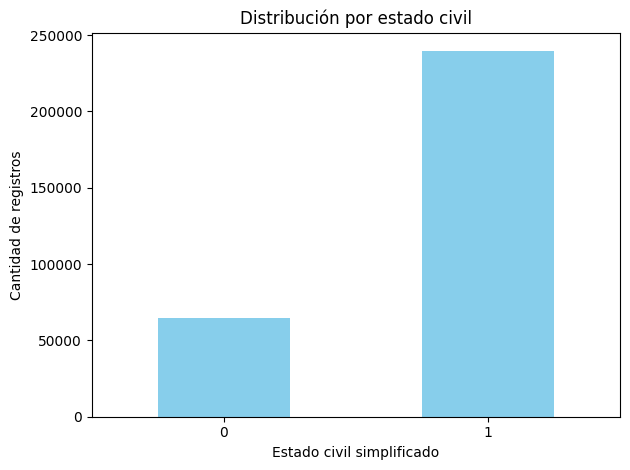

In [189]:
df = df[df['NAME_FAMILY_STATUS'].notnull()]

# Simplificar los valores de estado civil en 2 categorías principales
df['segmento_estado_civil'] = df['NAME_FAMILY_STATUS'].apply(
    lambda x: 1 if x in ['Married', 'Civil marriage'] else 0
)

# Contar cuántos registros hay en cada grupo
segmentos = df['segmento_estado_civil'].value_counts().sort_index()

# Eliminar la columna original (opcional)
df = df.drop(columns=['NAME_FAMILY_STATUS'])

# Graficar

segmentos.plot(kind='bar', color='skyblue')
plt.title('Distribución por estado civil')
plt.xlabel('Estado civil simplificado')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [190]:
#Comprobar datos y no validos - ocupacion
df["OCCUPATION_TYPE"].value_counts(dropna=False)

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64

In [191]:
#Mostrar todos los nulos que aparecen en los datos de las columnas
df.isnull().sum()

ID                       0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
AMT_INCOME_TOTAL         0
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
FLAG_MOBIL               0
FLAG_WORK_PHONE          0
FLAG_PHONE               0
FLAG_EMAIL               0
OCCUPATION_TYPE          0
CNT_FAM_MEMBERS          0
CODE_GENDER_F            0
CODE_GENDER_M            0
segmento_hijos           0
segmento_estado_civil    0
dtype: int64

In [192]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs() # Convertir los valores negativos a positivos

# Mostrar el resultado
print(df['DAYS_BIRTH'].head())

2    21474
3    19110
4    19110
5    19110
6    19110
Name: DAYS_BIRTH, dtype: int64


In [193]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() # Convertir los valores negativos a positivos

# Mostrar el resultado
print(df['DAYS_EMPLOYED'].head())

2    1134
3    3051
4    3051
5    3051
6    3051
Name: DAYS_EMPLOYED, dtype: int64


In [194]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,segmento_hijos,segmento_estado_civil
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,0,0,0,Security staff,2,False,True,0,1
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,0,1,1,Sales staff,1,True,False,0,0
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,0,1,1,Sales staff,1,True,False,0,0
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,0,1,1,Sales staff,1,True,False,0,0
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,0,1,1,Sales staff,1,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,202500,Working,Higher education,House / apartment,13510,2309,1,1,0,0,Laborers,2,False,True,0,1
438548,6839936,Y,Y,135000,Working,Secondary / secondary special,House / apartment,12569,2095,1,0,0,0,Laborers,3,False,True,1,1
438553,6840222,N,N,103500,Working,Secondary / secondary special,House / apartment,15939,3007,1,0,0,0,Laborers,1,True,False,0,0
438554,6841878,N,N,54000,Commercial associate,Higher education,With parents,8169,372,1,1,0,0,Sales staff,1,True,False,0,0


In [195]:
# Usando 365.2425 días por año (más preciso)
df['AGE_YEARS'] = round(df['DAYS_BIRTH'].abs() / 365.2425, 1)


In [196]:
# Usando 365.2425 días por año (más preciso)
df['AGE_EMPLOYED'] = round(df['DAYS_EMPLOYED'].abs() / 365.2425, 1)

In [197]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,segmento_hijos,segmento_estado_civil,AGE_YEARS,AGE_EMPLOYED
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,...,0,0,Security staff,2,False,True,0,1,58.8,3.1
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,202500,Working,Higher education,House / apartment,13510,2309,1,...,0,0,Laborers,2,False,True,0,1,37.0,6.3
438548,6839936,Y,Y,135000,Working,Secondary / secondary special,House / apartment,12569,2095,1,...,0,0,Laborers,3,False,True,1,1,34.4,5.7
438553,6840222,N,N,103500,Working,Secondary / secondary special,House / apartment,15939,3007,1,...,0,0,Laborers,1,True,False,0,0,43.6,8.2
438554,6841878,N,N,54000,Commercial associate,Higher education,With parents,8169,372,1,...,0,0,Sales staff,1,True,False,0,0,22.4,1.0


<Axes: >

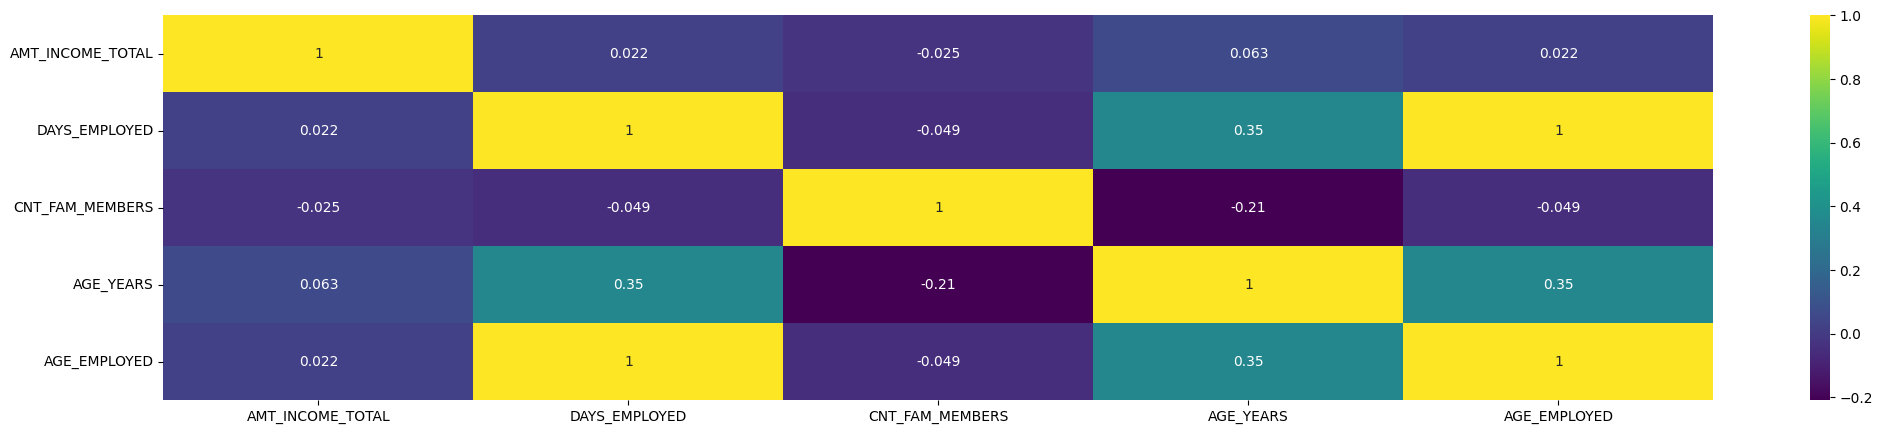

In [198]:
df_filtrado = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID', 'segmento_hijos', 'segmento_estado_civil', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_MOBIL', 'DAYS_BIRTH', 'FLAG_PHONE'])
plt.figure(figsize=(25,5))
sns.heatmap(df_filtrado.select_dtypes(include='number').corr(), annot=True, cmap="viridis")

aqui tenemos una respuesta de las variables int, y float, para poder darles un analisis correcto, excluyendo las tipo banderas, para poder darle una mejor interpretacion al grafico, para poder, dar una mejor conclusion, es bueno incluir otras variables economicas como: el tipo de trabajo y nivel educativo, para obtener el modelado del credito con una mayor presicion

In [199]:
df.info() #en este caso vamos a convertir las variables categoricas a numericas, entonces procedemos con la identificacion de las variables categoricas

<class 'pandas.core.frame.DataFrame'>
Index: 304354 entries, 2 to 438556
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     304354 non-null  int64  
 1   FLAG_OWN_CAR           304354 non-null  object 
 2   FLAG_OWN_REALTY        304354 non-null  object 
 3   AMT_INCOME_TOTAL       304354 non-null  int64  
 4   NAME_INCOME_TYPE       304354 non-null  object 
 5   NAME_EDUCATION_TYPE    304354 non-null  object 
 6   NAME_HOUSING_TYPE      304354 non-null  object 
 7   DAYS_BIRTH             304354 non-null  int64  
 8   DAYS_EMPLOYED          304354 non-null  int64  
 9   FLAG_MOBIL             304354 non-null  int64  
 10  FLAG_WORK_PHONE        304354 non-null  int64  
 11  FLAG_PHONE             304354 non-null  int64  
 12  FLAG_EMAIL             304354 non-null  int64  
 13  OCCUPATION_TYPE        304354 non-null  object 
 14  CNT_FAM_MEMBERS        304354 non-null  i

In [200]:
from sklearn.preprocessing import LabelEncoder
# Crear una instancia del codificador
le = LabelEncoder()
# Aplicar el codificador a las columnas categóricas
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
# Verificar el resultado
df[categorical_cols].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304354 entries, 2 to 438556
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     304354 non-null  int64  
 1   FLAG_OWN_CAR           304354 non-null  object 
 2   FLAG_OWN_REALTY        304354 non-null  object 
 3   AMT_INCOME_TOTAL       304354 non-null  int64  
 4   NAME_INCOME_TYPE       304354 non-null  object 
 5   NAME_EDUCATION_TYPE    304354 non-null  object 
 6   NAME_HOUSING_TYPE      304354 non-null  object 
 7   DAYS_BIRTH             304354 non-null  int64  
 8   DAYS_EMPLOYED          304354 non-null  int64  
 9   FLAG_MOBIL             304354 non-null  int64  
 10  FLAG_WORK_PHONE        304354 non-null  int64  
 11  FLAG_PHONE             304354 non-null  int64  
 12  FLAG_EMAIL             304354 non-null  int64  
 13  OCCUPATION_TYPE        304354 non-null  object 
 14  CNT_FAM_MEMBERS        304354 non-null  i

In [201]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,segmento_hijos,segmento_estado_civil,AGE_YEARS,AGE_EMPLOYED
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,...,0,0,Security staff,2,False,True,0,1,58.8,3.1
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,202500,Working,Higher education,House / apartment,13510,2309,1,...,0,0,Laborers,2,False,True,0,1,37.0,6.3
438548,6839936,Y,Y,135000,Working,Secondary / secondary special,House / apartment,12569,2095,1,...,0,0,Laborers,3,False,True,1,1,34.4,5.7
438553,6840222,N,N,103500,Working,Secondary / secondary special,House / apartment,15939,3007,1,...,0,0,Laborers,1,True,False,0,0,43.6,8.2
438554,6841878,N,N,54000,Commercial associate,Higher education,With parents,8169,372,1,...,0,0,Sales staff,1,True,False,0,0,22.4,1.0


In [202]:
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
# Verificar el resultado
df[categorical_cols].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304354 entries, 2 to 438556
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     304354 non-null  int64  
 1   FLAG_OWN_CAR           304354 non-null  object 
 2   FLAG_OWN_REALTY        304354 non-null  object 
 3   AMT_INCOME_TOTAL       304354 non-null  int64  
 4   NAME_INCOME_TYPE       304354 non-null  object 
 5   NAME_EDUCATION_TYPE    304354 non-null  object 
 6   NAME_HOUSING_TYPE      304354 non-null  object 
 7   DAYS_BIRTH             304354 non-null  int64  
 8   DAYS_EMPLOYED          304354 non-null  int64  
 9   FLAG_MOBIL             304354 non-null  int64  
 10  FLAG_WORK_PHONE        304354 non-null  int64  
 11  FLAG_PHONE             304354 non-null  int64  
 12  FLAG_EMAIL             304354 non-null  int64  
 13  OCCUPATION_TYPE        304354 non-null  object 
 14  CNT_FAM_MEMBERS        304354 non-null  i

<Axes: >

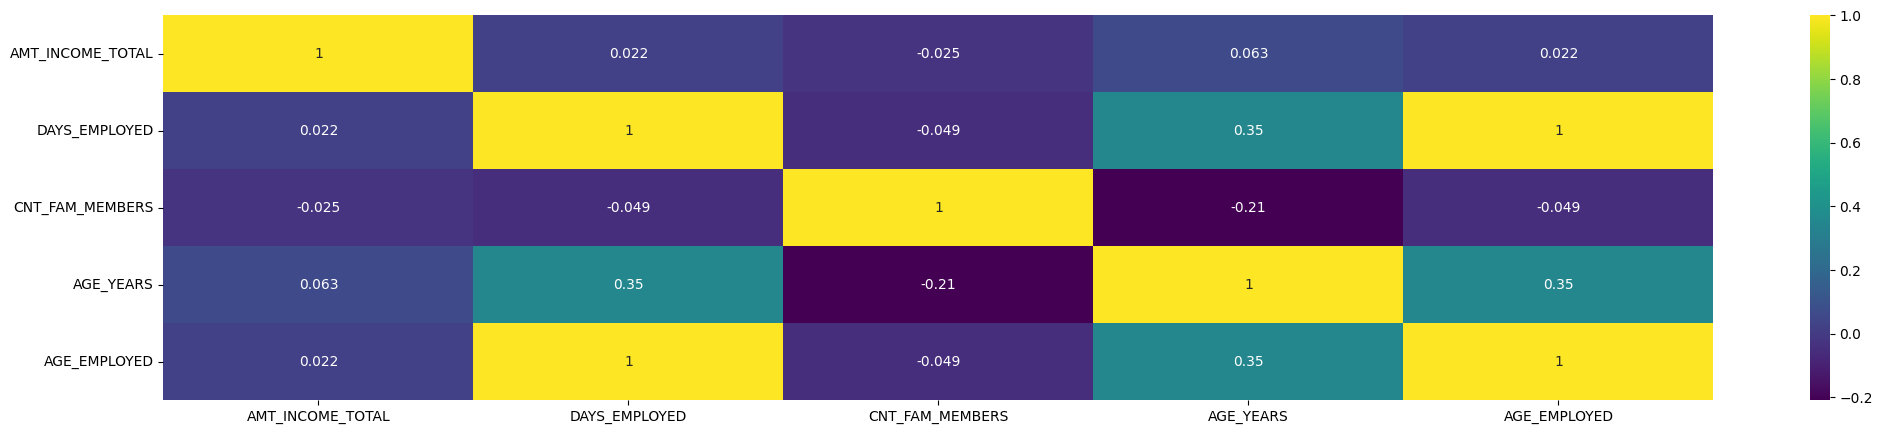

In [203]:
plt.figure(figsize=(25,5))

# Eliminar columnas no deseadas
df_filtered = df.drop(columns=[
    'ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'segmento_hijos', 'segmento_estado_civil',
    'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_MOBIL', 'DAYS_BIRTH', 'FLAG_PHONE', 'NAME_HOUSING_TYPE'
])

# Seleccionar sólo columnas numéricas
df_numeric = df_filtered.select_dtypes(include='number')

# Graficar matriz de correlación
sns.heatmap(df_numeric.corr(), annot=True, cmap="viridis")

In [204]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,segmento_hijos,segmento_estado_civil,AGE_YEARS,AGE_EMPLOYED
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,...,0,0,Security staff,2,False,True,0,1,58.8,3.1
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,1,1,Sales staff,1,True,False,0,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,202500,Working,Higher education,House / apartment,13510,2309,1,...,0,0,Laborers,2,False,True,0,1,37.0,6.3
438548,6839936,Y,Y,135000,Working,Secondary / secondary special,House / apartment,12569,2095,1,...,0,0,Laborers,3,False,True,1,1,34.4,5.7
438553,6840222,N,N,103500,Working,Secondary / secondary special,House / apartment,15939,3007,1,...,0,0,Laborers,1,True,False,0,0,43.6,8.2
438554,6841878,N,N,54000,Commercial associate,Higher education,With parents,8169,372,1,...,0,0,Sales staff,1,True,False,0,0,22.4,1.0


In [205]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [206]:
mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df['education_type_int'] = df['NAME_EDUCATION_TYPE'].map(mapping)

In [207]:
# Criterios lógicos, con los que se va a filtrar el dataset
df['criterio_ingreso'] = df['AMT_INCOME_TOTAL'] > 120000
df['criterio_edad'] = df['AGE_YEARS'].between(25, 60)
df['criterio_empleo'] = df['DAYS_EMPLOYED'] > 1000
df['criterio_educacion'] = df['education_type_int'] <= 1
df['criterio_familia'] = df['CNT_FAM_MEMBERS'] <= 5

In [208]:
# aqui aplicamos el modelo de scoring, para determinar si la persona es apta o no para el credito
# 1 = Apto, 0 = No apto
# Se suman los criterios y se asigna un valor de 1 o 0
df['estado_credito'] = (
    df['criterio_ingreso'].astype(int) +
    df['criterio_edad'].astype(int) +
    df['criterio_empleo'].astype(int) +
    df['criterio_educacion'].astype(int) +
    df['criterio_familia'].astype(int)
)

In [209]:
# con el lamda hacemos la logica, en este caso sencillo
df['estado_credito'] = df['estado_credito'].apply(lambda x: 1 if x >= 4 else 0)

In [210]:
# definimos x y y en el dataset
X = df[["AMT_INCOME_TOTAL", "AGE_YEARS", "DAYS_EMPLOYED", "education_type_int", "CNT_FAM_MEMBERS"]]
y = df['estado_credito']

In [211]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,segmento_estado_civil,AGE_YEARS,AGE_EMPLOYED,education_type_int,criterio_ingreso,criterio_edad,criterio_empleo,criterio_educacion,criterio_familia,estado_credito
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,...,1,58.8,3.1,2,False,True,True,False,True,0
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,0,52.3,8.4,2,True,True,True,False,True,1
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,0,52.3,8.4,2,True,True,True,False,True,1
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,0,52.3,8.4,2,True,True,True,False,True,1
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,0,52.3,8.4,2,True,True,True,False,True,1


In [212]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [214]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 100.00%


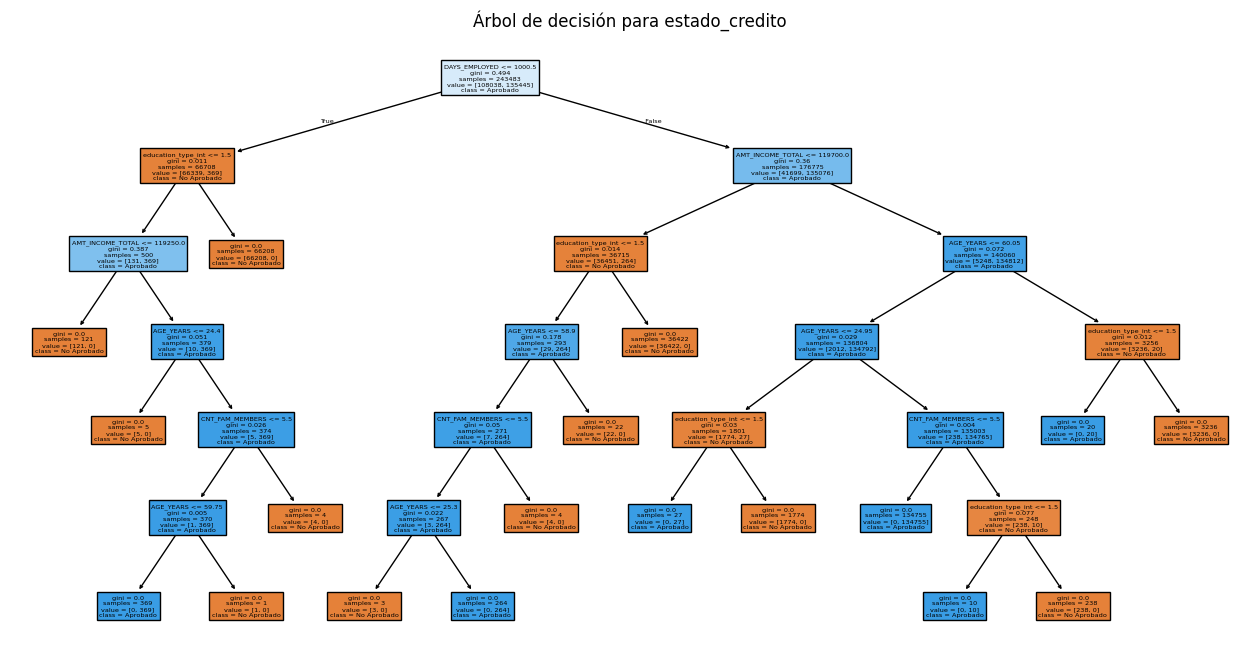

In [215]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"], filled=True)
plt.title("Árbol de decisión para estado_credito")
plt.show()

In [216]:
import numpy as np

df['estado_credito_rnd'] = df['estado_credito']
indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
df.loc[indices, 'estado_credito_rnd'] = 1 - df.loc[indices, 'estado_credito_rnd']

In [217]:
x_train.shape, x_test.shape

((243483, 5), (60871, 5))

In [218]:
escala = StandardScaler()
x_train = escala.fit_transform(x_train)
x_test = escala.transform(x_test)

In [219]:
import sklearn


RGL = sklearn.linear_model.LogisticRegression(class_weight = 'balanced')
RGL.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = RGL.predict(x_test)

In [221]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[21564,  5477],
       [10689, 23141]])

Text(95.72222222222221, 0.5, 'Real')

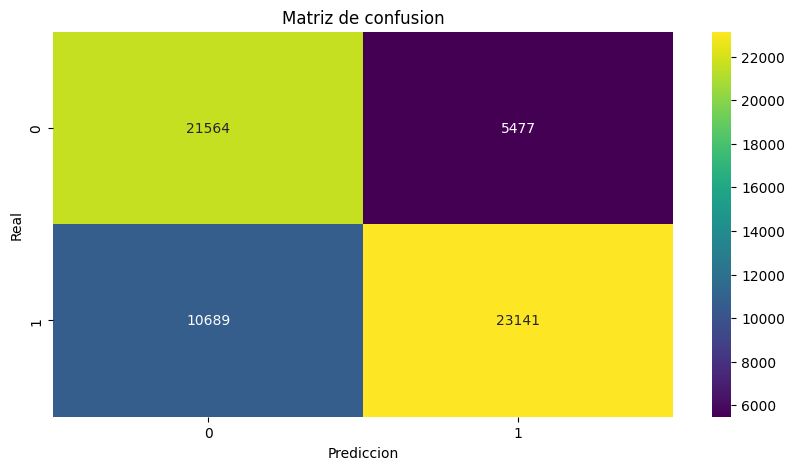

In [222]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap="viridis", fmt="d")
plt.title("Matriz de confusion")
plt.xlabel("Prediccion")
plt.ylabel("Real")

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     27041
           1       0.81      0.68      0.74     33830

    accuracy                           0.73     60871
   macro avg       0.74      0.74      0.73     60871
weighted avg       0.75      0.73      0.74     60871



In [224]:
y_proba = RGL.predict_proba(x_test)
y_proba

array([[0.68901166, 0.31098834],
       [0.23252696, 0.76747304],
       [0.67350117, 0.32649883],
       ...,
       [0.26633487, 0.73366513],
       [0.74442622, 0.25557378],
       [0.08355322, 0.91644678]], shape=(60871, 2))

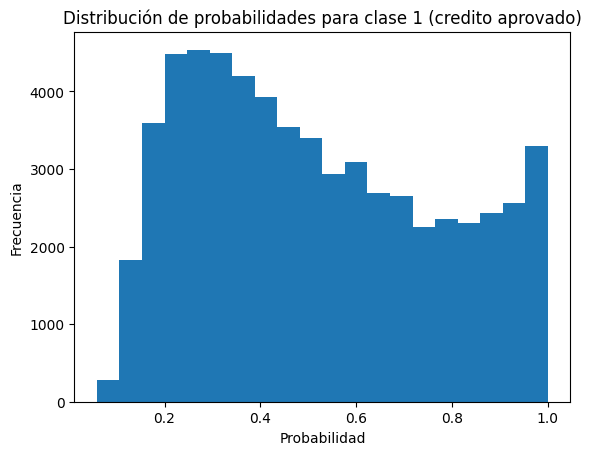

In [225]:
plt.hist(y_proba[:,1], bins=20)
plt.title("Distribución de probabilidades para clase 1 (credito aprovado)")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()

In [226]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(RGL, method='sigmoid')  # o 'isotonic'
calibrated_model.fit(x_train, y_train)


CalibratedClassifierCV(estimator=LogisticRegression(class_weight='balanced'))

In [ ]:
y_proba_calibrated = calibrated_model.predict_proba(x_test)
y_proba_calibrated

array([[0.64710724, 0.35289276],
       [0.18598408, 0.81401592],
       [0.62985799, 0.37014201],
       ...,
       [0.21634674, 0.78365326],
       [0.70947381, 0.29052619],
       [0.06105943, 0.93894057]], shape=(60871, 2))

In [228]:
y_proba_original = RGL.predict_proba(x_test)
y_proba_original

array([[0.68901166, 0.31098834],
       [0.23252696, 0.76747304],
       [0.67350117, 0.32649883],
       ...,
       [0.26633487, 0.73366513],
       [0.74442622, 0.25557378],
       [0.08355322, 0.91644678]], shape=(60871, 2))

In [229]:
#  probabilidades de clase 1
y_proba_original = RGL.predict_proba(x_test)[:, 1]
y_proba_calibrated = calibrated_model.predict_proba(x_test)[:, 1]

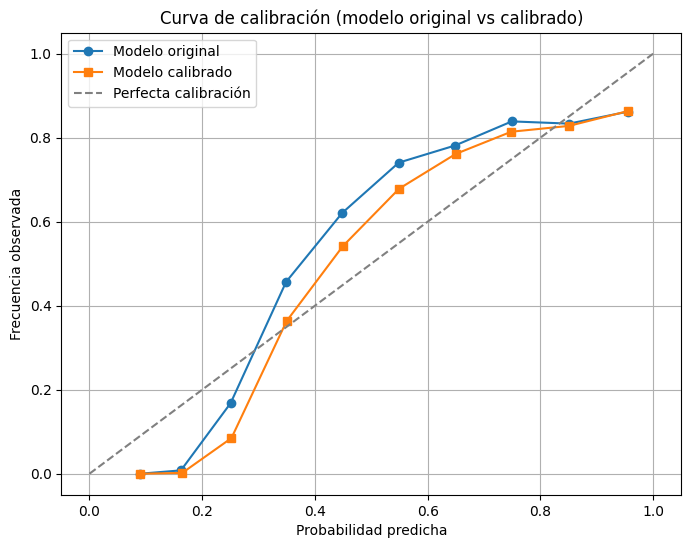

In [230]:
from sklearn.calibration import calibration_curve
# Curvas de calibración
prob_true_orig, prob_pred_orig = calibration_curve(y_test, y_proba_original, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='Modelo original')
plt.plot(prob_pred_cal, prob_true_cal, marker='s', label='Modelo calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfecta calibración')

plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia observada')
plt.title('Curva de calibración (modelo original vs calibrado)')
plt.legend()
plt.grid()

In [231]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

In [232]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Calcular las curvas
train_sizes, train_scores, val_scores = learning_curve(
    estimator=RGL,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 valores de tamaño
    cv=cv,
    scoring='accuracy',  # puedes cambiar a 'f1', 'roc_auc', etc.
    n_jobs=-1
)

In [233]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

In [234]:
train_scores_mean

array([0.7298696 , 0.73280283, 0.73382733, 0.73490772, 0.73539371,
       0.73525511, 0.73578585, 0.73572015, 0.73554621, 0.73559907])

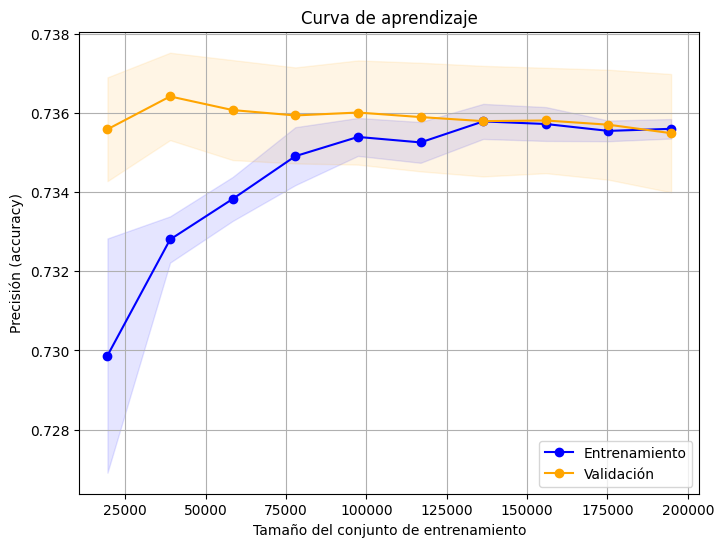

In [235]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_scores_mean, 'o-', label="Validación", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")

plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión (accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [236]:
df['estado_credito'].value_counts()

estado_credito
1    169275
0    135079
Name: count, dtype: int64

In [237]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,AGE_YEARS,AGE_EMPLOYED,education_type_int,criterio_ingreso,criterio_edad,criterio_empleo,criterio_educacion,criterio_familia,estado_credito,estado_credito_rnd
2,5008806,Y,Y,112500,Working,Secondary / secondary special,House / apartment,21474,1134,1,...,58.8,3.1,2,False,True,True,False,True,0,0
3,5008808,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,52.3,8.4,2,True,True,True,False,True,1,1
4,5008809,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,52.3,8.4,2,True,True,True,False,True,1,1
5,5008810,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,52.3,8.4,2,True,True,True,False,True,1,1
6,5008811,N,Y,270000,Commercial associate,Secondary / secondary special,House / apartment,19110,3051,1,...,52.3,8.4,2,True,True,True,False,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,202500,Working,Higher education,House / apartment,13510,2309,1,...,37.0,6.3,4,True,True,True,False,True,1,1
438548,6839936,Y,Y,135000,Working,Secondary / secondary special,House / apartment,12569,2095,1,...,34.4,5.7,2,True,True,True,False,True,1,1
438553,6840222,N,N,103500,Working,Secondary / secondary special,House / apartment,15939,3007,1,...,43.6,8.2,2,False,True,True,False,True,0,0
438554,6841878,N,N,54000,Commercial associate,Higher education,With parents,8169,372,1,...,22.4,1.0,4,False,False,False,False,True,0,0
